In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


    pip install "git+git://github.com/bblais/classy" --upgrade

In [2]:
from classy import *

Version:  0.0.25


#### Please *please* **please** keep your data somewhere outside of our shared google drive.  I don't want 30 copies of big image data sets.

In [20]:
data=load_excel('/Users/bblais/Desktop/ai373/data/iris.xls',verbose=True)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]


In [5]:
data

{'vectors': array([[1.4, 0.2, 5.1, 3.5],
        [1.4, 0.2, 4.9, 3. ],
        [1.3, 0.2, 4.7, 3.2],
        [1.5, 0.2, 4.6, 3.1],
        [1.4, 0.2, 5. , 3.6],
        [1.7, 0.4, 5.4, 3.9],
        [1.4, 0.3, 4.6, 3.4],
        [1.5, 0.2, 5. , 3.4],
        [1.4, 0.2, 4.4, 2.9],
        [1.5, 0.1, 4.9, 3.1],
        [1.5, 0.2, 5.4, 3.7],
        [1.6, 0.2, 4.8, 3.4],
        [1.4, 0.1, 4.8, 3. ],
        [1.1, 0.1, 4.3, 3. ],
        [1.2, 0.2, 5.8, 4. ],
        [1.5, 0.4, 5.7, 4.4],
        [1.3, 0.4, 5.4, 3.9],
        [1.4, 0.3, 5.1, 3.5],
        [1.7, 0.3, 5.7, 3.8],
        [1.5, 0.3, 5.1, 3.8],
        [1.7, 0.2, 5.4, 3.4],
        [1.5, 0.4, 5.1, 3.7],
        [1. , 0.2, 4.6, 3.6],
        [1.7, 0.5, 5.1, 3.3],
        [1.9, 0.2, 4.8, 3.4],
        [1.6, 0.2, 5. , 3. ],
        [1.6, 0.4, 5. , 3.4],
        [1.5, 0.2, 5.2, 3.5],
        [1.4, 0.2, 5.2, 3.4],
        [1.6, 0.2, 4.7, 3.2],
        [1.6, 0.2, 4.8, 3.1],
        [1.5, 0.4, 5.4, 3.4],
        [1.5, 0.1, 5.2, 4.1],

In [6]:
data.vectors.shape

(150, 4)

In [8]:
subset=extract_features(data,[0,2])
subset

{'extract': True, 'vectors': array([[1.4, 5.1],
        [1.4, 4.9],
        [1.3, 4.7],
        [1.5, 4.6],
        [1.4, 5. ],
        [1.7, 5.4],
        [1.4, 4.6],
        [1.5, 5. ],
        [1.4, 4.4],
        [1.5, 4.9],
        [1.5, 5.4],
        [1.6, 4.8],
        [1.4, 4.8],
        [1.1, 4.3],
        [1.2, 5.8],
        [1.5, 5.7],
        [1.3, 5.4],
        [1.4, 5.1],
        [1.7, 5.7],
        [1.5, 5.1],
        [1.7, 5.4],
        [1.5, 5.1],
        [1. , 4.6],
        [1.7, 5.1],
        [1.9, 4.8],
        [1.6, 5. ],
        [1.6, 5. ],
        [1.5, 5.2],
        [1.4, 5.2],
        [1.6, 4.7],
        [1.6, 4.8],
        [1.5, 5.4],
        [1.5, 5.2],
        [1.4, 5.5],
        [1.5, 4.9],
        [1.2, 5. ],
        [1.3, 5.5],
        [1.5, 4.9],
        [1.3, 4.4],
        [1.5, 5.1],
        [1.3, 5. ],
        [1.3, 4.5],
        [1.3, 4.4],
        [1.6, 5. ],
        [1.9, 5.1],
        [1.4, 4.8],
        [1.6, 5.1],
        [1.4, 4.6],
        [1.5

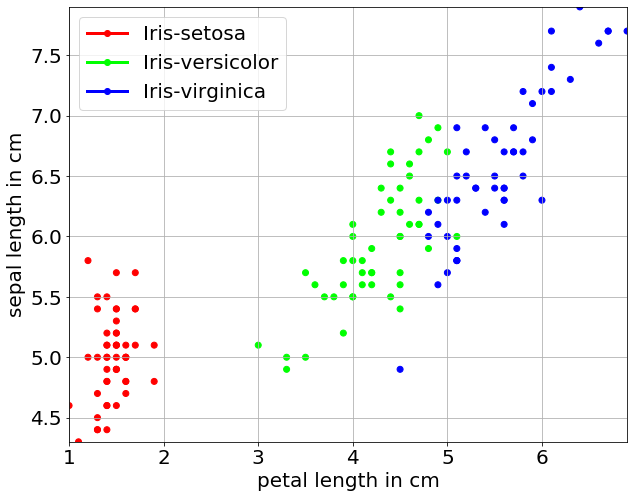

In [9]:
plot2D(subset,legend_location='upper left')

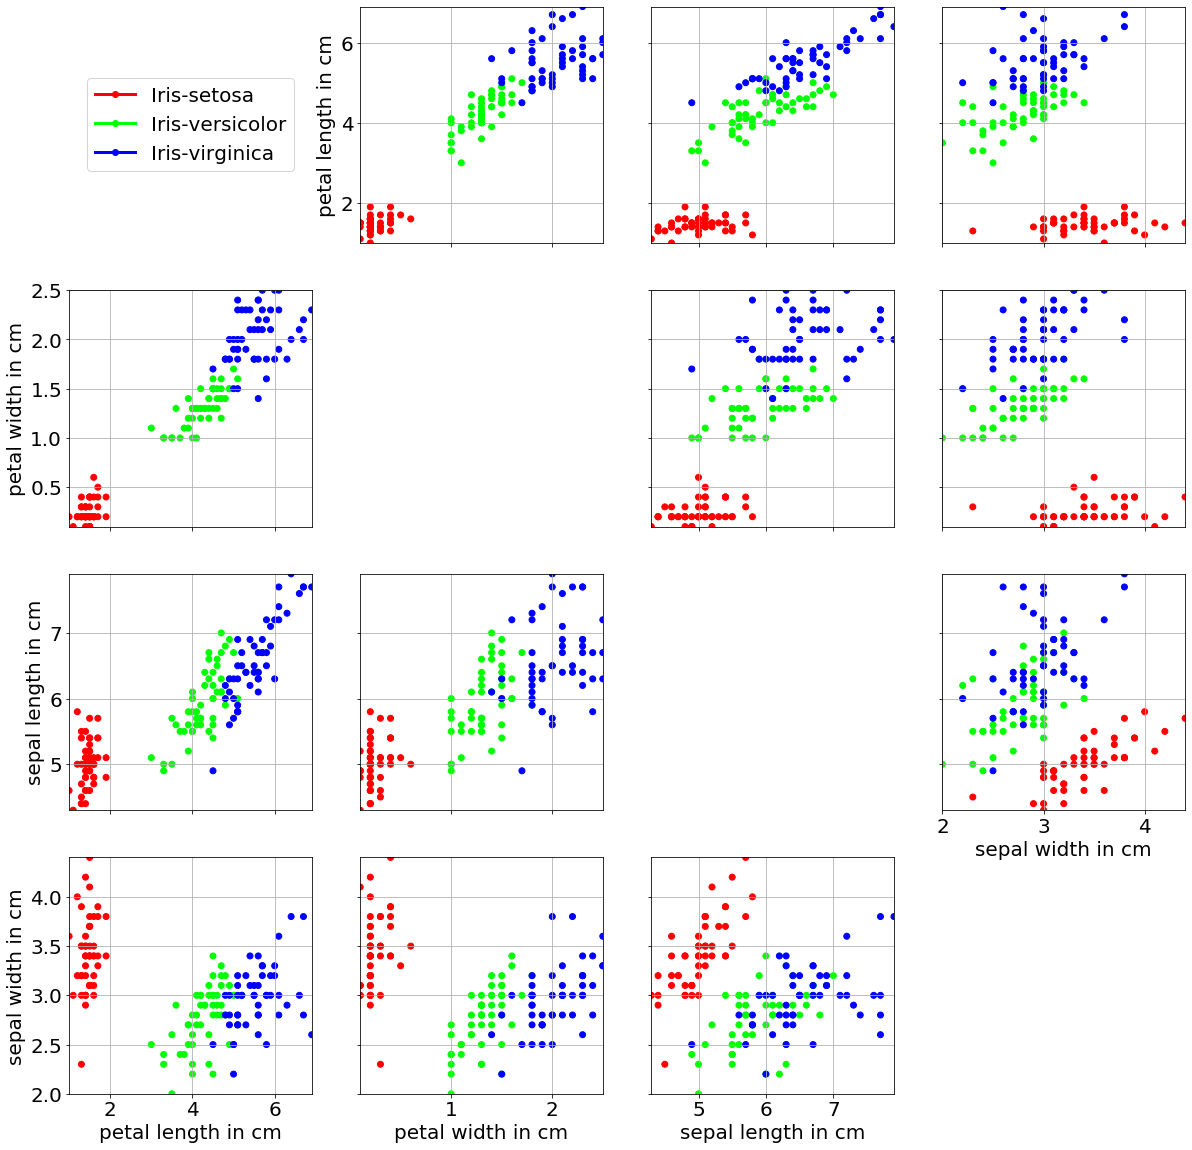

In [10]:
plot_feature_combinations(data)

## Classification

In [21]:
C=NaiveBayes()

In [22]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [23]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.0016980171203613281 seconds 


In [24]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 97.5
On Test Set: 86.66666666666667


In [15]:
C.means

array([[1.47435897, 0.23589744, 4.96410256, 3.35641026],
       [4.28378378, 1.34324324, 5.98918919, 2.77837838],
       [5.58181818, 2.03409091, 6.60227273, 2.97272727]])

In [25]:
C=kNearestNeighbor()

In [26]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.0054857730865478516 seconds 


In [27]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 96.66666666666667
On Test Set: 93.33333333333333


In [22]:
C=BackProp(hidden_layer_sizes = [5],max_iter=10000)
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

Time Reset
Training time:  3.5001208782196045 seconds 
On Training Set: 98.33333333333333
On Test Set: 96.66666666666667


In [23]:
C.weights

[array([[-1.52527927,  0.26926663,  1.46161855, -0.75135517, -1.93280315],
        [-1.59247706, -0.07169048,  2.34288561, -1.59081835, -1.5072253 ],
        [ 0.32336057, -0.10294395,  0.74796832,  1.3468648 ,  0.58290704],
        [ 1.38600893, -0.60121085, -0.64052033,  0.24931385,  0.97266564]]),
 array([[ 1.62552438e+00, -1.62289923e+00, -9.10261074e-01],
        [ 4.11888320e-01,  7.47336318e-01, -4.81229466e-01],
        [-1.70940874e+00, -2.24342430e+00,  1.22902519e+00],
        [ 9.44120657e-01,  3.15910976e+00, -1.26023287e+00],
        [ 1.95320122e+00, -1.95813187e+00, -6.80839012e-04]])]

In [28]:
images=image.load_images('/Users/bblais/Desktop/ai373/data/digits')

[0]: 178 files found
[1]: 182 files found
[2]: 177 files found
[3]: 183 files found
[4]: 181 files found
[5]: 182 files found
[6]: 181 files found
[7]: 179 files found
[8]: 174 files found
[9]: 180 files found


In [29]:
data=image.images_to_vectors(images)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
Mean:  [0.00000000e+00 4.71341124e+00 8.25158598e+01 1.88401224e+02
 1.88589872e+02 9.17840846e+01 2.15581525e+01 2.04785754e+00
 8.51419032e-02 3.14913745e+01 1.65203116e+02 1.90677240e+02
 1.63504174e+02 1.30023372e+02 2.92036728e+01 1.70005565e+00
 4.22927101e-02 4.11185309e+01 1.57575960e+02 1.11080690e+02
 1.12814691e+02 1.24173066e+02 2.82609905e+01 7.82971619e-01
 1.66944908e-02 3.90011130e+01 1.44642181e+02 1.40286589e+02
 1.58007791e+02 1.20022816e+02 3.66889260e+01 3.33889816e-02
 0.00000000e+00 3.70083472e+01 1.21928770e+02 1.44347245e+02
 1.63978854e+02 1.39081803e+02 4.60222593e+01 0.00000000e+00
 1.37451308e-01 2.49860879e+01 1.09460768e+02 1.14961046e+02
 1.21993879e+02 1.30974958e+02 5.47762938e+01 4.24040067e-01
 1.13522538e-01 1.10378408e+01 1.19312187e+02 1.

In [30]:
data_train,data_test=split(data)

Original vector shape:  (1797, 64)
Train vector shape:  (1347, 64)
Test vector shape:  (450, 64)


In [31]:
C=NaiveBayes()
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

Time Reset
Training time:  0.004393815994262695 seconds 
On Training Set: 87.00816629547143
On Test Set: 79.77777777777779


In [33]:
C.means.shape

(10, 64)

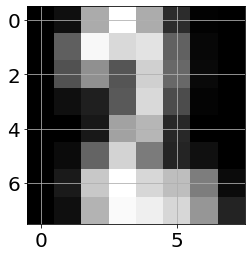

In [34]:
image.vector_to_image(C.means[2,:],(8,8))

In [38]:
images=image.load_images('/Users/bblais/Desktop/ai373/images/all_pieces')

[black]: 192 files found
[red]: 192 files found
[white]: 128 files found


In [41]:
images.data[0].shape

(57, 66, 3)

In [42]:
data=image.images_to_vectors(images)

512 vectors of length 11286
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p11281', 'p11282', 'p11283', 'p11284', 'p11285'  (11286 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [129.1875    136.5234375 130.4375    ... 129.1875    136.5234375
 130.4375   ]
Median:  [175.5 184.  174.  ... 175.5 184.  174. ]
Stddev:  [67.94258836 67.75472364 65.81324192 ... 67.94258836 67.75472364
 65.81324192]


In [7]:
data_train,data_test=split(data)

Original vector shape:  (512, 11286)
Train vector shape:  (384, 11286)
Test vector shape:  (128, 11286)


In [44]:
C=kNearestNeighbor()
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

Time Reset
Training time:  0.0035872459411621094 seconds 
On Training Set: 99.1833704528582
On Test Set: 98.22222222222223


In [8]:
C=CSC()

In [9]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

Time Reset
Training time:  6.976958990097046 seconds 
On Training Set: 100.0
On Test Set: 85.15625


In [17]:
test_image=image.load_images('/Users/bblais/Desktop/ai373/images/all_pieces/black/piece259.png')
test_vector=image.images_to_vectors(test_image)

[None]: 1 files found
1 vectors of length 11286
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p11281', 'p11282', 'p11283', 'p11284', 'p11285'  (11286 features)
No Target values.
Target names: [None]
Mean:  [188. 183. 177. ... 179. 188. 185.]
Median:  [188. 183. 177. ... 179. 188. 185.]
Stddev:  [0. 0. 0. ... 0. 0. 0.]


In [18]:
C.predict(test_vector.vectors)

array([0])